# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from tqdm.auto import tqdm

%matplotlib inline

In [2]:

QAP_INSTANCE_URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug30.dat'
print(QAP_INSTANCE_URL)

http://anjos.mgi.polymtl.ca/qaplib/data.d/nug30.dat


## Reading input data

In [2]:
def read(problem):
    global n, A, B
    QAP_INSTANCE_URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{problem}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    #print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Distance matrix:\n', B)

## Objective function

In [4]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [230]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

ValueError: operands could not be broadcast together with shapes (25,) (12,) 

## Random Sampling

In [8]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

87.08107042312622
586.0 [ 4  3  7 11  5 10  6  8  9  1  0  2]


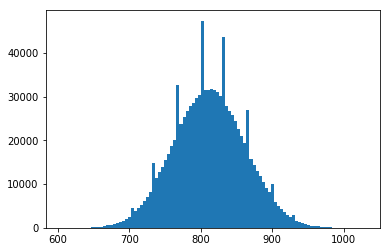

811.921768 49.7013396173


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

In [238]:
iterations = 10
costs = np.zeros(iterations)
read("nug24")
for i in tqdm(range(10)):
    costs[i] = SA(10000, 100, 0.999984, 1)[1]
    print(costs[i])


4014.0
4074.0
4014.0
4044.0
3934.0
4036.0
4030.0
3918.0
4006.0
3978.0



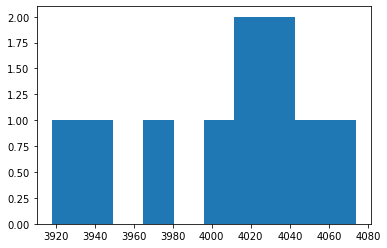

4004.8 46.22726468221973


In [239]:
plt.figure()
plt.hist(costs)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [5]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q, np.abs(i - j)

In [18]:
def basicSA(T, radius, alpha):

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q, diff = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    return (time.time() - t0, costs.min())

In [28]:
for (index, problem) in tqdm(enumerate(problems)):
    read(problem)
    print(f"\n{problem}\n")
    for i in range(10):
        solution = basicSA(T, 1, 1.0)
        print(f"Result: {solution[1]}. Optimum solution: {optimal_solutions[index]}. "
         +f"Difference: {optimal_solutions[index] - solution[1]}")


Nug12

Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 582.0. Optimum solution: 578. Difference: -4.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0

Nug14

Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1018.0. Optimum solution: 1014. Difference: -4.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1016.0. Optimum solution: 1014. Difference: -2.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1016.0. Optimum solution: 1014. Differenc

In [28]:
T = 500000
for (index, problem) in tqdm(enumerate(problems)):
    read(problem)
    print(f"\n{problem}\n")
    for i in range(10):
        solution = basicSA(T, 1, 0.01)
        print(f"Result: {solution[1]}. Optimum solution: {optimal_solutions[index]}. "
         +f"Difference: {optimal_solutions[index] - solution[1]}")


Nug12

Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0

Nug14

Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1016.0. Optimum solution: 1014. Difference: -2.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference:

In [233]:
def do_test(problem, optimal_solution):
    print(f"Solving {problem}")
    print(f"Optimal solution: {optimal_solution}")
    read(problem)
    for i in np.arange(0.7, 1.1, 0.1):
        print(f"Alpha = {i}")
        basicSA(700000, 1, i)

In [226]:
do_test("nug25", 3744)

Solving nug25
Optimal solution: 3744
Alpha = 1
95.79679083824158 3744.0
Alpha = 2
91.10629439353943 3758.0
Alpha = 3
97.6995141506195 3750.0


In [158]:
datas = []

T = 500000
radius = 1
alpha = 1.0
temperature = 300
t0 = time.time()
t_change = 0.999984
p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in tqdm(range(1)):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(-(q_cost - p_cost)/temperature)):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    temperature = temperature * t_change
    if t%100000 == 0:
        print(temperature)
        

print(time.time() - t0, costs.min())

16


299.9952

0.03388261795043945 0.0


In [6]:
def SA(T, temperature, t_change, radius):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q, diff = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(-(q_cost - p_cost)/temperature)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        temperature = temperature * t_change

    return(time.time() - t0, costs.min())

In [17]:
problems = ['Nug12','Nug14', 'Nug15', 'Nug16b', 'Nug17', 'Nug18', 'Nug20',
            'Nug21', 'Nug22', 'Nug24', 'Nug25', 'Nug27', 'Nug28']
optimal_solutions = [578, 1014, 1150, 1240, 1732, 1930, 2570, 
                     2438, 3596, 3488, 3744, 5234, 5166]

In [8]:
T = 500000
temperature = 300
t_change = 0.99999
radius = 1

## Zadanie A/E

In [29]:
print(f"Solving for T = {T}, temp = {temperature}, t_change = {t_change}, radius = {radius}")
for (index, problem) in tqdm(enumerate(problems)):
    read(problem)
    print(f"\n{problem}\n")
    for i in range(10):
        solution = SA(T, temperature, t_change, radius)
        print(f"Result: {solution[1]}. Optimum solution: {optimal_solutions[index]}. "
         +f"Difference: {optimal_solutions[index] - solution[1]}")

Solving for T = 500000, temp = 300, t_change = 0.99999, radius = 1



Nug12

Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0
Result: 578.0. Optimum solution: 578. Difference: 0.0

Nug14

Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1016.0. Optimum solution: 1014. Difference: -2.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1018.0. Optimum solution: 1014. Difference: -4.0
Result: 1014.0. Optimum solution: 1014. Difference: 0.0
Result: 1014.0. Optimum solution: 1014. Difference

In [ ]:
def temp_change(temp):
    return temp*0.99999

iter = 500000
t = np.zeros(iter)
t[0] = 500


for i in range(1, iter):
    t[i] = temp_change(t[i-1])
plt.figure(figsize=(26, 8), dpi = 300)
plt.plot(t)
plt.title("Temperature decline")
plt.show()

In [ ]:
T = 500000
t = np.zeros(T+1)
t[1] = T/1
for i in range(1, T):
    t[2] = T/(i*1)

plt.figure(figsize=(26, 8), dpi = 300)
plt.plot(t)
plt.show()

## Zadanie B

### Histogram dla 1000 wywołań Nug15

In [11]:
iters = 500
results = np.zeros(500)
read('Nug15')
for i in tqdm(range(iters)):
    results[i] = SA(T, temperature, t_change, radius)[1]

In [13]:
iters = 500
results2 = np.zeros(500)
read('Nug15')
for i in tqdm(range(iters)):
    results2[i] = SA(T, temperature, t_change, radius)[1]

In [14]:
all_results = np.append(results, results2)

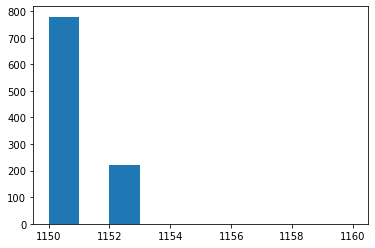

1150.45 0.8817596044274199


In [15]:
plt.figure()
plt.hist(all_results)
plt.show()

print(all_results.mean(), all_results.std())

## Zadanie C



In [19]:
def verboseSA(T, temperature, t_change, radius, basic = False):
    t0 = time.time()
    
    m = 1000
    successes = 0
    losses = 0
    draws = 0
    all_successes = np.zeros(int(T/m))
    all_losses = np.zeros(int(T/m))
    all_draws = np.zeros(int(T/m))
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    differences = [[] for _ in range(n+1)]
    for t in range(T):
        q, diff = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if basic:
            cond = np.exp(- 1 * (q_cost - p_cost) * t/T)
        else:
            cond = np.exp(-(q_cost - p_cost)/temperature)
        if(q_cost < p_cost):
            differences[diff].append(p_cost - q_cost)
            p, p_cost = q, q_cost
            successes += 1
        elif np.random.rand() < cond:
            p, p_cost = q, q_cost
            losses += 1
        else:
            draws += 1
            
        costs[t] = p_cost
        temperature = temperature * t_change
        
        if((t+1)%m == 0):
            thousand = int((t+1)/m)
            all_successes[thousand-1] = successes
            all_losses[thousand-1] = losses
            all_draws[thousand-1] = draws
            successes = 0
            losses = 0
            draws = 0

    return(all_successes, all_losses, all_draws, differences)

In [24]:
read("nug17")
s1, l1, d1, dif1 = verboseSA(500000, 300,   0.999990, 1)
s2, l2, d2, dif2 = verboseSA(500000, 400,   0.99997, 1)
s3, l3, d3, dif3 = verboseSA(500000, 2000,  0.999985, 1)
s4, l4, d4, dif4 = verboseSA(500000, 3000,  0.999983, 1)
s5, l5, d5, dif5 = verboseSA(500000, 10000, 0.999980, 1)

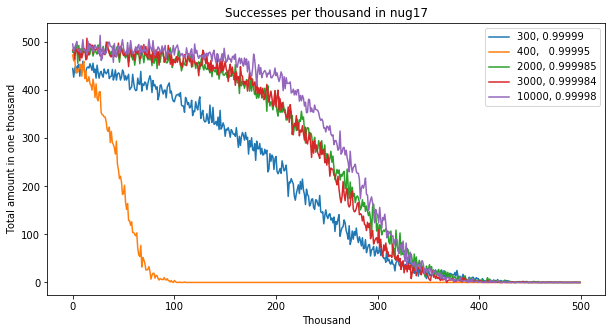

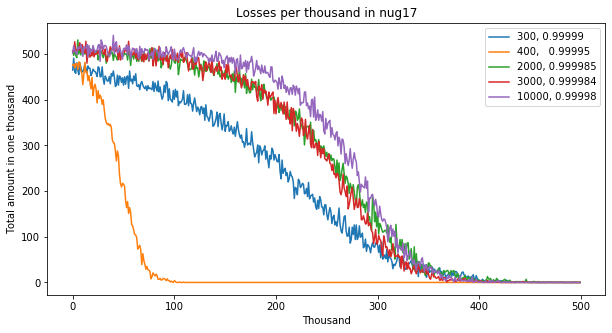

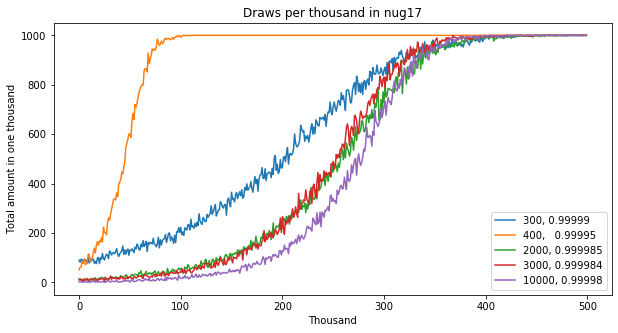

In [25]:

plt.figure(figsize=(10, 5))
plt.title("Successes per thousand in nug17")
plt.plot(s1, label = "300, 0.99999")
plt.plot(s2, label = "400,   0.99995")
plt.plot(s3, label = "2000, 0.999985")
plt.plot(s4, label = "3000, 0.999984")
plt.plot(s5, label = "10000, 0.99998")
plt.xlabel("Thousand")
plt.ylabel("Total amount in one thousand")
plt.legend()

plt.show()
plt.figure(figsize=(10, 5))
plt.title("Losses per thousand in nug17")
plt.plot(l1, label = "300, 0.99999")
plt.plot(l2, label = "400,   0.99995")
plt.plot(l3, label = "2000, 0.999985")
plt.plot(l4, label = "3000, 0.999984")
plt.plot(l5, label = "10000, 0.99998")
plt.xlabel("Thousand")
plt.ylabel("Total amount in one thousand")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Draws per thousand in nug17")
plt.plot(d1, label = "300, 0.99999")
plt.plot(d2, label = "400,   0.99995")
plt.plot(d3, label = "2000, 0.999985")
plt.plot(d4, label = "3000, 0.999984")
plt.plot(d5, label = "10000, 0.99998")
plt.xlabel("Thousand")
plt.ylabel("Total amount in one thousand")
plt.legend()
plt.show()

## Zadanie D

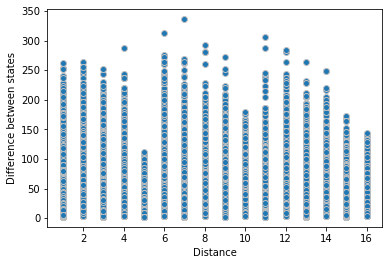

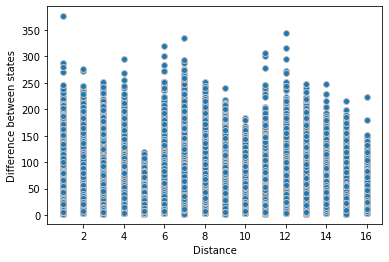

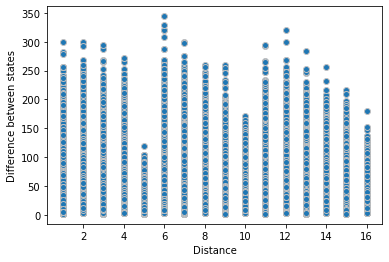

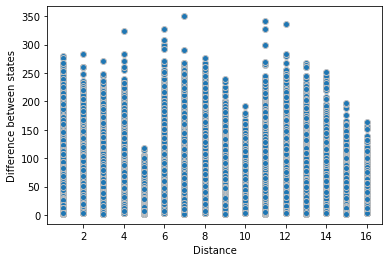

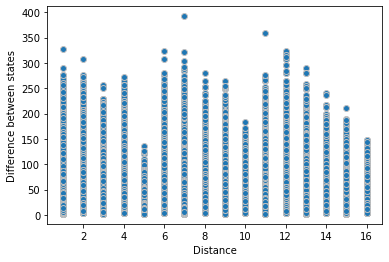

In [24]:
for e in [dif1, dif2, dif3, dif4, dif5]:
    xs = []
    ys = []
    for i in range(len(e)):
        ys += e[i]
        xs += [i for _ in range(len(e[i]))]
    plt.figure()
    plt.xlabel("Distance")
    plt.ylabel("Difference between states")
    plt.scatter(xs, ys, edgecolors = '#C0C0C0')

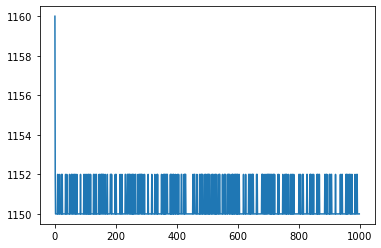

In [30]:
plt.figure()
plt.plot(all_results)
plt.show()